### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
print("Missing values per column:")
print(data.isnull().sum())
print("\nDataFrame Info:")
print(data.info())

Missing values per column:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
--- 

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# Dropping the 'car' column because it has too many missing values (over 99%)
data = data.drop(columns=['car'])

# Drop rows with missing values in the specific frequency columns to ensure accurate analysis
# Correctness of these columns are required for the upcoming questions 
frequency_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
data = data.dropna(subset=frequency_cols)

# Verify cleaning
print("Missing values after cleaning:")
print(data.isnull().sum())

Missing values after cleaning:
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon?



In [6]:
# the mean value is multiplied with 100 because the values 
# of Y column are 0 and 1 so when the mean value is
# calculated it becomes the decimal percentage value
# so when we multiply it with 100 we find the percentage
# value of the rate.
# This same idea will be used in subsequent code blocks too.
acceptance_rate = data['Y'].mean() * 100
print(f"Proportion of accepted coupons: {acceptance_rate}%")

Proportion of accepted coupons: 56.93352098683666%


5. Use a bar plot to visualize the `coupon` column.

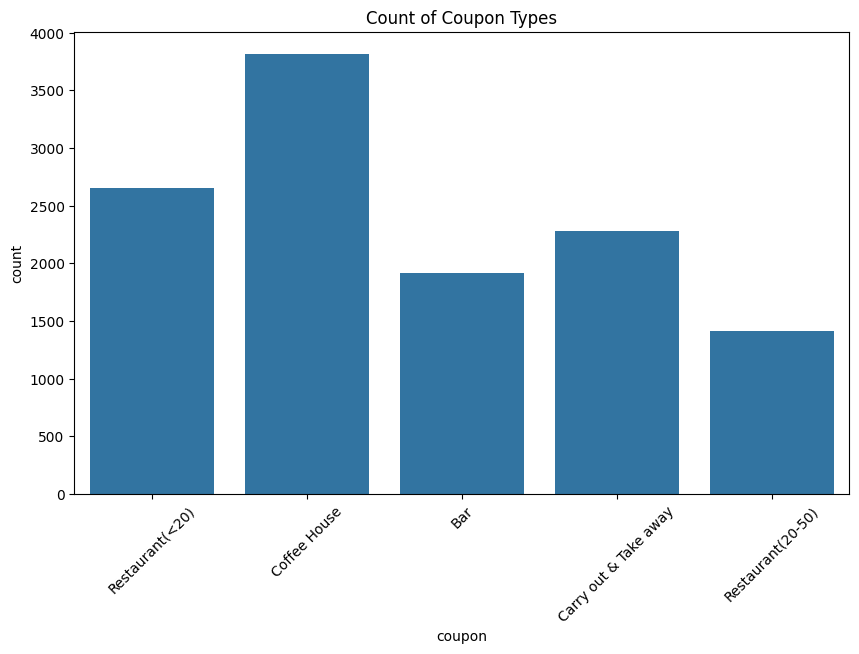

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='coupon', data=data)
plt.title('Count of Coupon Types')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

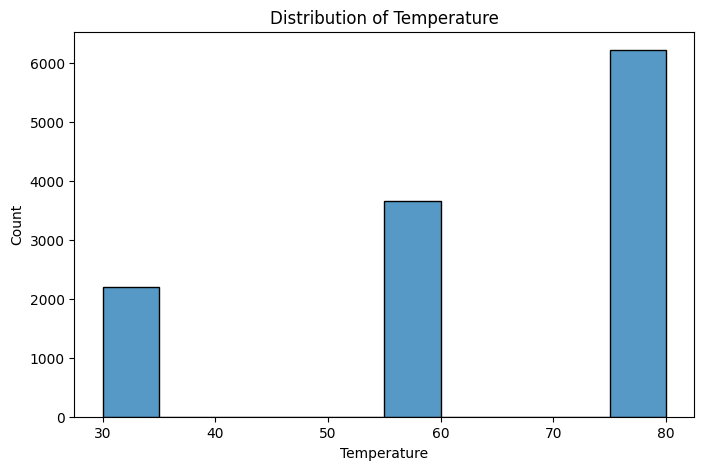

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(data['temperature'], bins=10)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
# here i applied copy operation to prevent any
# change to the original data source
df_bar = data[data['coupon'] == 'Bar'].copy()

2. What proportion of bar coupons were accepted?


In [10]:
bar_acceptance_rate = df_bar['Y'].mean() * 100
print(f"Bar coupon acceptance rate: {bar_acceptance_rate}%")

Bar coupon acceptance rate: 41.19184526921067%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [11]:
# Define groups of bar visits
fewer_3_list = ['never', 'less1', '1~3']
more_3_list = ['4~8', 'gt8']

# Filter data in to the groups
bar_fewer_3 = df_bar[df_bar['Bar'].isin(fewer_3_list)]
bar_more_3 = df_bar[df_bar['Bar'].isin(more_3_list)]

# Calculate rates
rate_fewer_3 = bar_fewer_3['Y'].mean() * 100
rate_more_3 = bar_more_3['Y'].mean() * 100

print(f"Acceptance rate (3 or fewer times/month): {rate_fewer_3}%")
print(f"Acceptance rate (More than 3 times/month): {rate_more_3}%")

Acceptance rate (3 or fewer times/month): 37.26744186046512%
Acceptance rate (More than 3 times/month): 76.16580310880829%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [12]:
# Helper function to normalize Age data
def normalize_age(age_str):
    if age_str == 'below21': return 20
    if age_str == '50plus': return 51
    return int(age_str)

# Create a numeric age column for normalized age data
df_bar['age_int'] = df_bar['age'].apply(normalize_age)

# Define conditions
more_once_list = ['1~3', '4~8', 'gt8']
cond_freq = df_bar['Bar'].isin(more_once_list)
cond_age = df_bar['age_int'] > 25

# Split groups by the help of NOT operator (~) of pandas
group_target = df_bar[cond_freq & cond_age]
group_others = df_bar[~(cond_freq & cond_age)]

group_target_rate = group_target['Y'].mean() * 100
group_others_rate = group_others['Y'].mean() * 100

print(f"Acceptance rate (Bar > 1/month & Age > 25): {group_target_rate}%")
print(f"Acceptance rate (All Others): {group_others_rate}%")

Acceptance rate (Bar > 1/month & Age > 25): 68.98263027295285%
Acceptance rate (All Others): 33.77483443708609%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [13]:
# Define conditions of the query
cond_passenger = df_bar['passanger'] != 'Kid(s)'
cond_occupation = df_bar['occupation'] != 'Farming Fishing & Forestry'

# Combine with frequency condition from previous step 
# (cond_freq is created in the previous step)
group_target_5 = df_bar[cond_freq & cond_passenger & cond_occupation]
group_others_5 = df_bar[~(cond_freq & cond_passenger & cond_occupation)]

group_target_5_rate = group_target_5['Y'].mean() * 100
group_others_5_rate = group_others_5['Y'].mean() * 100

print(f"Acceptance rate (Target Group): {group_target_5_rate}%")
print(f"Acceptance rate (All Others): {group_others_5_rate}%")

Acceptance rate (Target Group): 70.94339622641509%
Acceptance rate (All Others): 29.790310918293567%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [14]:
# Query condition 1: Bar > 1, No Kid, Not Widowed
cond_1 = cond_freq & (df_bar['passanger'] != 'Kid(s)') & (df_bar['maritalStatus'] != 'Widowed')

# Query condition 2: Bar > 1, Age < 30
cond_2 = cond_freq & (df_bar['age_int'] < 30)

# Query condition 3: Cheap Rest > 4, Income < 50K
cheap_rest_list = ['4~8', 'gt8']
income_list = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
cond_3 = (df_bar['RestaurantLessThan20'].isin(cheap_rest_list)) & (df_bar['income'].isin(income_list))

# Combine conditions with OR to search for these conditions in the rows
final_cond = cond_1 | cond_2 | cond_3

cond1_rate = df_bar[cond_1]['Y'].mean() * 100
cond2_rate = df_bar[cond_2]['Y'].mean() * 100
cond3_rate = df_bar[cond_3]['Y'].mean() * 100

group_target_6 = df_bar[final_cond]
group_others_6 = df_bar[~final_cond]

group_target_6_rate = group_target_6['Y'].mean() * 100
group_others_6_rate = group_others_6['Y'].mean() * 100

print(f"Acceptance rate (Condition 1): {cond1_rate}%")
print(f"Acceptance rate (Condition 2): {cond2_rate}%")
print(f"Acceptance rate (Condition 3): {cond3_rate}%")
print(f"Acceptance rate (Target Group): {group_target_6_rate}%")
print(f"Acceptance rate (All Others): {group_others_6_rate}%")

Acceptance rate (Condition 1): 70.94339622641509%
Acceptance rate (Condition 2): 71.95121951219512%
Acceptance rate (Condition 3): 45.645645645645644%
Acceptance rate (Target Group): 58.71313672922251%
Acceptance rate (All Others): 29.991431019708653%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [15]:
print("Hypothesis:")
print("1. Drivers who frequent bar goers (more than once a month) are the most likely demographic to accept bar coupons.")
print("2. This behavior is consistent across age groups (both >25 and <30)")
print("3. Presence of children reduces likelihood, while social passengers (friends/partners) likely increase it.")
print("4. Low income habits (Less than 50K and going cheap restaurants) decreases the likelihood")

Hypothesis:
1. Drivers who frequent bar goers (more than once a month) are the most likely demographic to accept bar coupons.
2. This behavior is consistent across age groups (both >25 and <30)
3. Presence of children reduces likelihood, while social passengers (friends/partners) likely increase it.
4. Low income habits (Less than 50K and going cheap restaurants) decreases the likelihood


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [16]:
# Create a DataFrame for Coffee House coupons
df_coffee = data[data['coupon'] == 'Coffee House'].copy()
coffee_acceptance_rate = df_coffee['Y'].mean() * 100

print(f"Coffee House Acceptance Rate: {coffee_acceptance_rate}")

Coffee House Acceptance Rate: 49.63312368972746


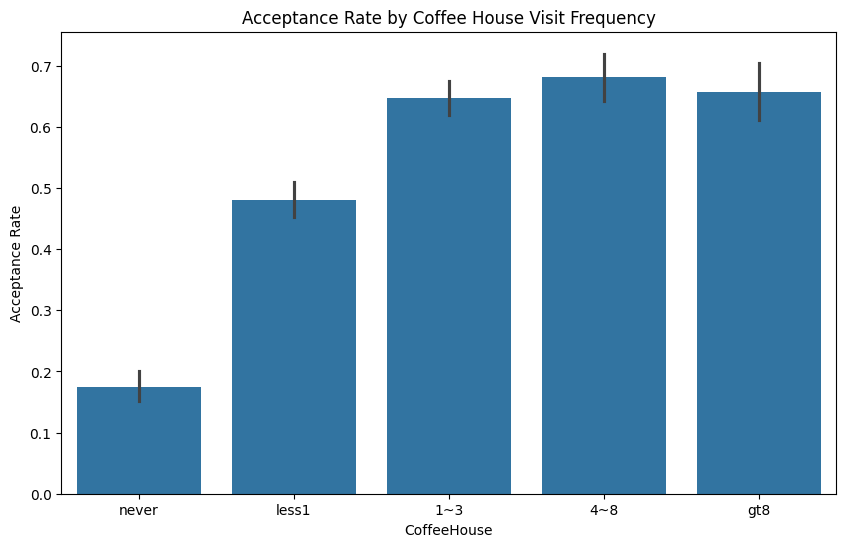

In [17]:
# Visualize acceptance by frequency of visits
plt.figure(figsize=(10,6))
sns.barplot(x='CoffeeHouse', y='Y', data=df_coffee, order=['never', 'less1', '1~3', '4~8', 'gt8'])
plt.title('Acceptance Rate by Coffee House Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.show()

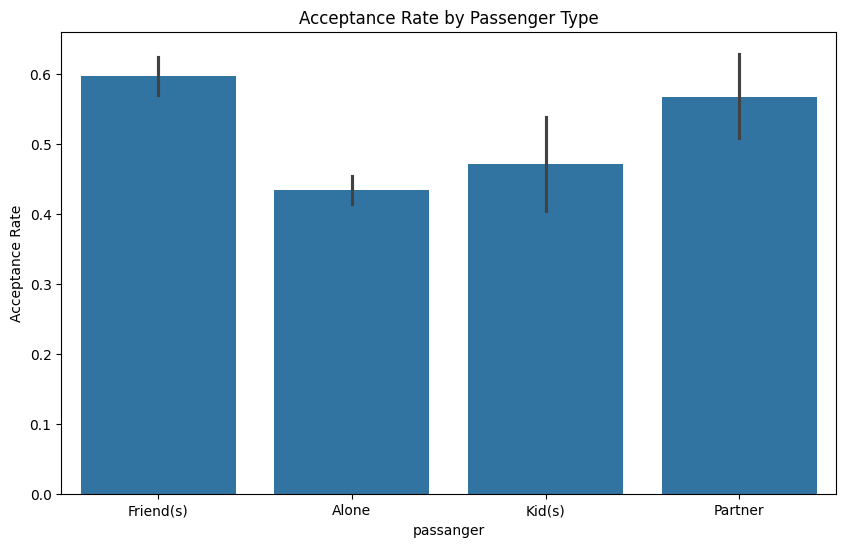

In [18]:
# Visualize acceptance by passenger type
plt.figure(figsize=(10,6))
sns.barplot(x='passanger', y='Y', data=df_coffee)
plt.title('Acceptance Rate by Passenger Type')
plt.ylabel('Acceptance Rate')
plt.show()

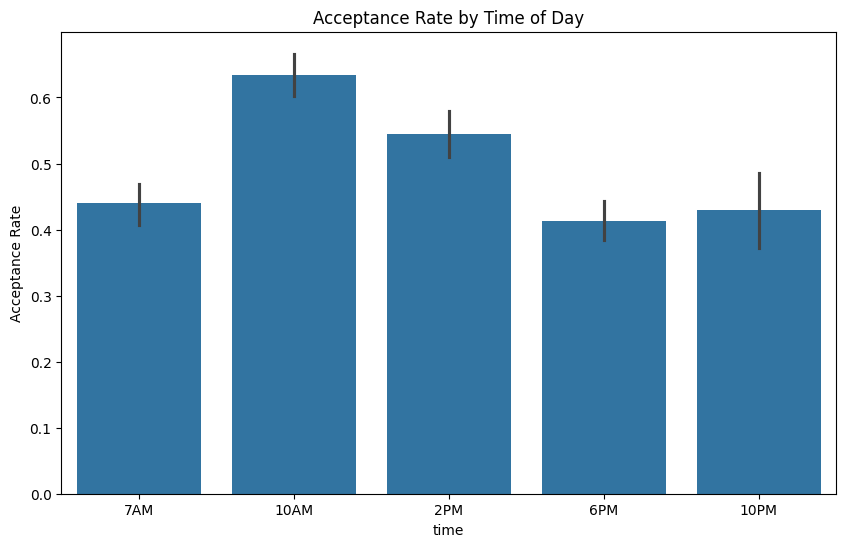

In [19]:
# Visualize acceptance by time of day
plt.figure(figsize=(10,6))
sns.barplot(x='time', y='Y', data=df_coffee, order=['7AM', '10AM', '2PM', '6PM', '10PM'])
plt.title('Acceptance Rate by Time of Day')
plt.ylabel('Acceptance Rate')
plt.show()

In [20]:
# Findings
print("1. Frequency: People who visit coffee houses at least once a month have a much higher acceptance rate (~65%) compared to those who never go (~17%).")
print("2. Passenger: Driving with friends or partners increases the likelihood of acceptance compared to driving alone.")
print("3. Time: Coupons offered in the morning (10AM) are most effective, with acceptance rates dropping in the evening.")

1. Frequency: People who visit coffee houses at least once a month have a much higher acceptance rate (~65%) compared to those who never go (~17%).
2. Passenger: Driving with friends or partners increases the likelihood of acceptance compared to driving alone.
3. Time: Coupons offered in the morning (10AM) are most effective, with acceptance rates dropping in the evening.
